In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
%matplotlib inline


### <font color=black> -------------> </font>
### <font color=blue> Get Experiment <font color=green> **NZ** </font> file details </font>

##### <font color=blue> Get  <font color=red> **LOCAL** </font> files </font>

In [2]:
exp         = 'NZrerun.TG.full.twok'
path        = '/scratch/pk695/FACTS/002_fork/facts/experiments-pkjr002/999_old/{arg1}/output/'.format(arg1=exp)
#
# filename1   = '{arg1}.total.workflow.wf4.local.nc'.format(arg1=exp)
filename1   = '{arg1}.NZInsarGPS.NZInsarGPS.verticallandmotion_localsl.nc'.format(arg1=exp)


d_nc        = xr.open_dataset(path + filename1)
#
# FILENAME1 = '/scratch/pk695/radical.pilot.sandbox/re.session.hal0261.amarel.rutgers.edu.pk695.019397.0007/pilot.0000/totaled/NZrerun.TG.full.twok.total.workflow.wf1f.local.nc'
# d_nc        = xr.open_dataset(FILENAME1)
d_nc

<xarray.Dataset>
Dimensions:           (samples: 2000, years: 15, locations: 2000)
Coordinates:
  * years             (years) int64 2005 2020 2030 2040 ... 2120 2130 2140 2150
  * locations         (locations) int64 1 2 3 ... 1000202480 1000202490
  * samples           (samples) int64 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
Data variables:
    sea_level_change  (samples, years, locations) float32 ...
    lat               (locations) float64 ...
    lon               (locations) float64 ...
Attributes:
    description:  Local SLR contributions from vertical land motion according...
    history:      Created Thu Feb  9 11:55:12 2023
    source:       SLR Framework: NZInsarGPS workflow
    scenario:     NA
    baseyear:     2005

In [3]:
path+filename1

'/scratch/pk695/FACTS/002_fork/facts/experiments-pkjr002/999_old/NZrerun.TG.full.twok/output/NZrerun.TG.full.twok.NZInsarGPS.NZInsarGPS.verticallandmotion_localsl.nc'

In [4]:
# exp        = 'NZrerun.TG.ten'
# path       = '/scratch/pk695/FACTS/002_fork/facts/experiments-pkjr002/{arg1}/output/'.format(arg1=EXP)
# filename   = '{arg1}.total.workflow.*.local.nc'.format(arg1=EXP)
# #
# fnames     = glob.glob(path+filename)
# wf_id      = [fname.split('.')[7] for fname in fnames]
# #
# ddict = {s:{} for s in wf_id}
# for s in ddict:
# #     print('{arg1}.total.workflow.%s.local.nc'.format(arg1=EXP)%s)
#     ddict[s] = xr.open_mfdataset(path+'{arg1}.total.workflow.%s.local.nc'.format(arg1=EXP)%s)
# # ddict

In [5]:
# yr = 2100
# west, east, south, north = 172, 174, -34, -35
# wf_id = 'wf4'
# ds = ddict[wf_id].isel(locations=slice(1,None)).sel(years=yr)
# #
# fig = plt.figure(figsize=[12, 4])
# ax = plt.axes(projection=cartopy.crs.PlateCarree())
# ax.set_extent([west, east, south, north], cartopy.crs.PlateCarree())
# #ax.add_feature(cartopy.feature.GSHHSFeature(scale = 'intermediate', edgecolor='k',facecolor='grey'),zorder=2)
# ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))

# # Add sites
# #ax.plot(ds.lon.values, ds.lat.values, transform=cartopy.crs.PlateCarree(),
# #        marker='o', color='r', markersize=5, linestyle='')
# p = ax.scatter(ds.lon.values, ds.lat.values, transform=cartopy.crs.PlateCarree(),
#                c=ds.median('samples').sea_level_change.values/1000, s=40, vmax=85)
# fig.colorbar(p)  
# gl = ax.gridlines(linestyle=':', color='k', alpha=0.5, draw_labels=True, x_inline=False, y_inline=False)
# gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
# gl.ylocator = mticker.FixedLocator(np.arange(-90,90,5))
# gl.top_labels = False
# gl.right_labels = False
# plt.show()

### <font color=black> -------------> </font>
### <font color=blue> PLOT: Spatial <font color=red> **TG** </font> Rates </font>

In [6]:
longitude = d_nc['lon'].to_dataframe().values
latitude = d_nc['lat'].to_dataframe().values
#

df_TEMP = []
YEAR        = 2100
percentList = [50] #, 17, 83] 
Yind        = np.where(d_nc["years"].values == YEAR)[0][0]
LOC         = d_nc.coords['locations'].values
#
for ind,loc in enumerate(LOC):
    # Loop over stations
    GMSL        = (d_nc["sea_level_change"][:,Yind,ind].values)/1000
    # Find Percentiles.
    pcntle   = np.percentile(GMSL[:], percentList );    pcntle = np.around(pcntle,2)
    df_TEMP.append( [latitude[ind],longitude[ind], ] + pcntle.tolist() )
df_ptile = pd.DataFrame( df_TEMP, columns=['lat','lon', ] + [ f'col_{x}' for xi, x in enumerate( percentList )] )
df_ptile

,lat,lon,col_50
0,[48.38],[-4.49],0.12
1,[53.92],[14.23],0.12
2,[51.45],[0.74],0.12
3,[53.31],[-4.62],0.12
4,[53.87],[8.72],0.12
...,...,...,...
1995,[88.0],[-115.0],0.12
1996,[88.0],[-114.0],0.12
1997,[88.0],[-113.0],0.12
1998,[88.0],[-112.0],0.12


NameError: name 'cbar' is not defined

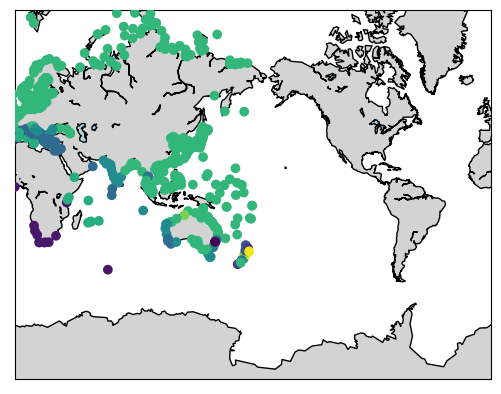

In [7]:
# Latitude and longitude values for NZ
min_lon = 0.0
max_lon = 360.0
min_lat = -80.0
max_lat = 80.0

# Create the map
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='lightgray', lake_color='lightblue')
# m.scatter(longitude, latitude, latlon=True, marker='.', color='red', zorder=5)
sc = m.scatter(longitude, latitude, latlon=True, marker='o', c=df_ptile.col_50, zorder=15)


cb_ymin = df_ptile.col_50.min()
cb_ymax = df_ptile.col_50.max()
cb_xmin, cb_xmax = cbar.ax.get_xlim()
cbar.ax.set_ylim(cb_ymin, cb_ymax)
cbar = m.colorbar(sc)

plt.title("WF 1e MEDIAN GMSL for 2100 (m)")


plt.show()